Circuit Basics

In [2]:
import numpy as np
from qiskit import QuantumCircuit

In [3]:
# Build the quantum circuit
qc = QuantumCircuit(3)  

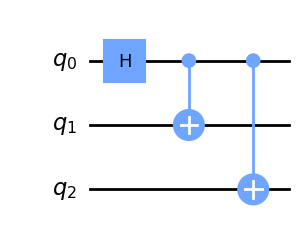

In [4]:
# 3 qubit GHZ state --- |000> + |111>

# Hadamard(H) -- puts it into superposition
qc.h(0)
# CNOT -- puts the qubits 0 and 1(target) into bell state
qc.cx(0, 1)
# CNOT -- puts the qubits 0 and 2(target) into bell state
qc.cx(0, 2)

# draw the circuit
qc.draw("mpl")


Simulating circuit

In [5]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(qc)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [6]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

In [ ]:
state.draw('qsphere')

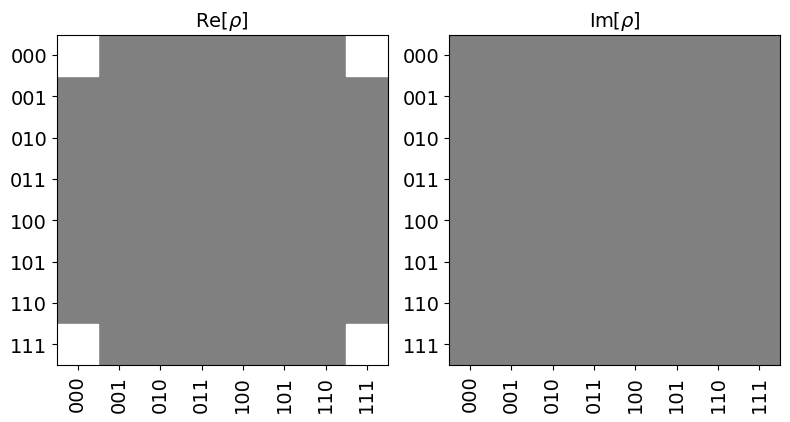

In [8]:
state.draw('hinton')

OpenQASM backend

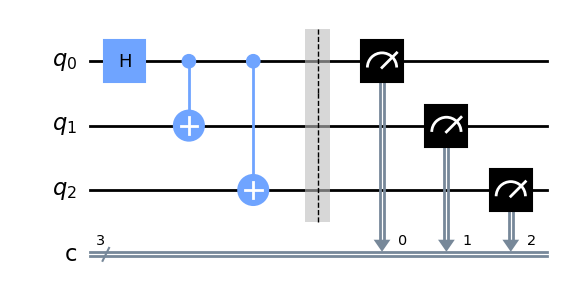

In [10]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(qc, range(3), front=True)

#drawing the circuit
qc.draw('mpl')

In [ ]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile 

# Use AerSimulator
from qiskit.providers.aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table
# %qiskit_copyright